In [12]:
import pandas as pd

# Load the uploaded dataset
file_path = '/Users/deveshdhyani/Documents/Disertation/Final_Draft/data/Combined_Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
print(data.describe())

         Unnamed: 0
count  53043.000000
mean   26521.000000
std    15312.339501
min        0.000000
25%    13260.500000
50%    26521.000000
75%    39781.500000
max    53042.000000


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assume 'data' is already defined and contains the 'statement' and 'status' columns

# Check for missing or invalid values in the 'statement' column
invalid_entries = data['statement'].isnull().sum()

# Drop rows with missing or invalid values in the 'statement' column
data_cleaned = data.dropna(subset=['statement'])

# Extract features and labels again after cleaning
X_cleaned = data_cleaned['statement']
y_cleaned = data_cleaned['status']

# Split the cleaned data into training and test sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Transform the cleaned text data to TF-IDF features
X_train_tfidf_cleaned = tfidf.fit_transform(X_train_cleaned)
X_test_tfidf_cleaned = tfidf.transform(X_test_cleaned)

# Initialize and train the Extra Trees Classifier on cleaned data
clf_cleaned = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf_cleaned.fit(X_train_tfidf_cleaned, y_train_cleaned)

# Predict on the cleaned test set
y_pred_cleaned = clf_cleaned.predict(X_test_tfidf_cleaned)

# Evaluate the model on cleaned data
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
report_cleaned = classification_report(y_test_cleaned, y_pred_cleaned)

accuracy_cleaned, report_cleaned


(0.6704944481351428,
 '                      precision    recall  f1-score   support\n\n             Anxiety       0.94      0.43      0.59       755\n             Bipolar       1.00      0.31      0.47       527\n          Depression       0.50      0.84      0.63      3016\n              Normal       0.83      0.94      0.88      3308\nPersonality disorder       0.96      0.28      0.43       237\n              Stress       0.98      0.23      0.37       536\n            Suicidal       0.73      0.35      0.47      2158\n\n            accuracy                           0.67     10537\n           macro avg       0.85      0.48      0.55     10537\n        weighted avg       0.74      0.67      0.65     10537\n')

In [5]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the cleaned dataset
smote = SMOTE(random_state=42)
X_tfidf_cleaned = tfidf.fit_transform(X_cleaned)
X_smote, y_smote = smote.fit_resample(X_tfidf_cleaned, y_cleaned)

# Split the augmented data into training and test sets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Initialize and train the Extra Trees Classifier on SMOTE data
clf_smote = ExtraTreesClassifier(n_estimators=50, random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)

# Predict on the SMOTE test set
y_pred_smote = clf_smote.predict(X_test_smote)

# Evaluate the model with SMOTE data
accuracy_smote = accuracy_score(y_test_smote, y_pred_smote)
report_smote = classification_report(y_test_smote, y_pred_smote)

print(accuracy_smote)
print(report_smote)


0.8991302827673616
                      precision    recall  f1-score   support

             Anxiety       0.97      0.97      0.97      3375
             Bipolar       0.99      0.97      0.98      3214
          Depression       0.71      0.69      0.70      3274
              Normal       0.86      0.94      0.90      3325
Personality disorder       1.00      1.00      1.00      3241
              Stress       0.99      0.96      0.98      3209
            Suicidal       0.76      0.76      0.76      3243

            accuracy                           0.90     22881
           macro avg       0.90      0.90      0.90     22881
        weighted avg       0.90      0.90      0.90     22881



In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the uploaded dataset
file_path = '/Users/deveshdhyani/Documents/Disertation/Final_Draft/data/Combined_Data.csv'
data = pd.read_csv(file_path)

# Remove rows with missing 'statement' values
data_cleaned = data.dropna(subset=['statement'])

# Sample the data
sampled_data = data_cleaned.sample(frac=0.1, random_state=42)

# Extract features and labels
X_sampled = sampled_data['statement']
y_sampled = sampled_data['status']

# Combine X and y into a single DataFrame for oversampling
oversampling_data = pd.concat([X_sampled, y_sampled], axis=1)

# Find the maximum class count
max_class_count = oversampling_data['status'].value_counts().max()

# Oversample the dataset
oversampled_data = oversampling_data.groupby('status').apply(lambda x: x.sample(max_class_count, replace=True, random_state=42)).reset_index(drop=True)

# Separate the oversampled data into features and labels
X_oversampled = oversampled_data['statement']
y_oversampled = oversampled_data['status']

# Split the oversampled data into training and testing sets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
tfidf_vectorizer_over = TfidfVectorizer(max_features=1000)
X_train_over_tfidf = tfidf_vectorizer_over.fit_transform(X_train_over)
X_test_over_tfidf = tfidf_vectorizer_over.transform(X_test_over)

# Train the Extra Trees Classifier with reduced number of estimators
model_over = ExtraTreesClassifier(n_estimators=250, random_state=42)
model_over.fit(X_train_over_tfidf, y_train_over)

# Make predictions and evaluate the model
y_over_pred = model_over.predict(X_test_over_tfidf)

accuracy_over = accuracy_score(y_test_over, y_over_pred)
classification_rep_over = classification_report(y_test_over, y_over_pred)

accuracy_over, classification_rep_over


/var/folders/z7/w5bn8bvd4gn6ncplr933nsmc0000gn/T/ipykernel_35515/1737633183.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  oversampled_data = oversampling_data.groupby('status').apply(lambda x: x.sample(max_class_count, replace=True, random_state=42)).reset_index(drop=True)


(0.9611566681053086,
 '                      precision    recall  f1-score   support\n\n             Anxiety       0.98      0.99      0.99       348\n             Bipolar       0.99      0.99      0.99       331\n          Depression       0.94      0.87      0.90       354\n              Normal       0.95      0.97      0.96       329\nPersonality disorder       1.00      1.00      1.00       324\n              Stress       1.00      0.99      0.99       317\n            Suicidal       0.87      0.92      0.89       314\n\n            accuracy                           0.96      2317\n           macro avg       0.96      0.96      0.96      2317\n        weighted avg       0.96      0.96      0.96      2317\n')

In [4]:
print(classification_rep_over)


                      precision    recall  f1-score   support

             Anxiety       0.98      0.99      0.99       348
             Bipolar       0.99      0.99      0.99       331
          Depression       0.94      0.87      0.90       354
              Normal       0.95      0.97      0.96       329
Personality disorder       1.00      1.00      1.00       324
              Stress       1.00      0.99      0.99       317
            Suicidal       0.87      0.92      0.89       314

            accuracy                           0.96      2317
           macro avg       0.96      0.96      0.96      2317
        weighted avg       0.96      0.96      0.96      2317



<Figure size 1000x800 with 0 Axes>

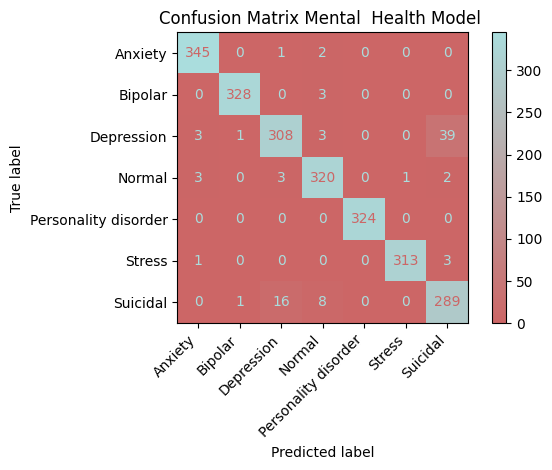

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_over, y_over_pred)

#custom_colors = ['#cc6666', '#dd9966', '#eedd88', '#eeeeaa', '#cceecc', '#aadddd', '#6699cc']

# Define the custom color #f46d43 and create a colormap based on it
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#cc6666', '#aadddd'])

# Plot the confusion matrix with the custom colormap
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model_over.classes_)
disp.plot(cmap=custom_cmap, values_format='g')

# Rotate the x-axis labels for better alignment
plt.xticks(rotation=45, ha='right')
plt.title('Confusion Matrix Mental  Health Model ')

# Display the plot
plt.tight_layout()
plt.show()

# Save the confusion matrix as an image (optional)
# plt.savefig('/path_to_save/confusion_matrix.png')


In [18]:
misclassified_indices = (y_test_over != y_over_pred) & ((y_test_over == 'Depression') | (y_test_over == 'Suicidal'))
misclassified_data = pd.DataFrame({
    'True Label': y_test_over[misclassified_indices],
    'Predicted Label': y_over_pred[misclassified_indices],
    'Statement': X_test_over[misclassified_indices]
})

# Show the misclassified data between 'Depression' and 'Suicidal'
misclassified_data_dep_suicidal = misclassified_data[((misclassified_data['True Label'] == 'Depression') & (misclassified_data['Predicted Label'] == 'Suicidal') )| ((misclassified_data['True Label'] == 'Suicidal') & (misclassified_data['Predicted Label'] == 'Depression') )]
misclassified_data_dep_suicidal

,True Label,Predicted Label,Statement
10034,Suicidal,Depression,"I do not know why I am posting this, especially on my main account, whether it is to find comfort with potentially like-minded people, to just throw it out into the anonymous void that is the internet, or just to vent further but I truly feel in my heart if I had a gun or maybe a rope, just some means where I KNOW I would be dead while also not risking the lives of other people like I potentially would be if I jumped off the nearest bridge, I would be gone. My urge is strong, stronger than it is ever been, I feel hopeless and unable to get help, but I have also failed enough in life and the last thing I want to do is fail at ending it too.I used the Lifeline Chat, and I know some people have had bad experiences with both the hotline and the chat, but I do think the person I got was trying to help as best they could, and maybe I will try to use the resources they presented me with to try and get on the road to recovery, I just do not know what that road even is anymore nor where it might take me.I guess the Sticky Notes version of my life is: Grew up in a somewhat dysfunctional family. Mom died young, after I graduated, and it messed me up, Dad developed Dementia and I was essentially forced to take care of him with little support until I finally broke down and he had to go to a nursing home. Pretty isolated from the rest of the family with few remaining friends. I was in a good position at work I guess but my life is literally my miserable job then nothing else meaningful and I am finding it harder to tough through my mental blocks and have been missing work, dying up my bank account and am close to homeless. I truly do not know nor understand what exactly is wrong with me. No car (Never learned to actually drive) and have to walk everywhere. Therapy would cost money but juggling therapy with my job so I could afford it seems impractical in my position. Maybe I am just too lazy to make it work? I dunno. I could go on but feel I have rambled long enough.Thanks for reading... Whatever this is. If I had a gun right now, I would be dead."
4401,Depression,Suicidal,"I have no motivation to do things after work or on weekends anymore. Whenever I get home from work, the next work day cannot come quick enough. Whenever the weekend starts, I cannot wait for it to finish.I use to hate work and look forward to free time. But I have found a job I like and it seems to have shown me how much I dislike my personal life/free time. Talking to friends helps, but I cannot take all of their free time up. How do I enjoy going to work and look forward to coming home? I look forward to work because it distracts me from my personal life."
4347,Depression,Suicidal,"Just felt like I needed to get that off my chest. I am grateful for the lack of suicidal ideation today, but I have been feeling ugh since yesterday. Just been so busy on top of long work shifts (12 hours). So, yeah, thanks for letting me yell this into the void. Needed it. Feeling like I want to die, but not feeling suicidal."
4680,Depression,Suicidal,Clearly on my mind more than normal. do not really have any motivation to keep on going. Boyfriend mentioned I joke about killing myself a lot recently
3717,Depression,Suicidal,"I lay in bed for hours to the point of back pain. I get up for work 30 minutes before I have to clock in. I have no motivation to do anything on my days off, I literally stare at my computer screen, and have to force myself to do something. The bare minimum. More and more I find myself wanting to end it. Would that be so bad? I ask myself. I am lonely, always broke, hopeless and disgusting looking, and half blind. I know nobody could ever actually want me. I have a decent paying job but am always playing catch up financially.In the end I resolve not to kill myself, though I do not want to continue living. I would not be upset if something killed me. No I think Id be grateful. I am always tired."
4366,Depr

# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/Users/deveshdhyani/Documents/Disertation/Final_Draft/data/Combined_Data.csv'
data = pd.read_csv(file_path)

# Dropping the unnecessary column 'Unnamed: 0'
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Dropping rows with missing 'statement' values
data_cleaned = data_cleaned.dropna(subset=['statement'])

# Calculate the length of each statement
data_cleaned['statement_length'] = data_cleaned['statement'].apply(len)


/var/folders/z7/w5bn8bvd4gn6ncplr933nsmc0000gn/T/ipykernel_66815/2442914217.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='status', order=data_cleaned['status'].value_counts().index, palette='viridis')


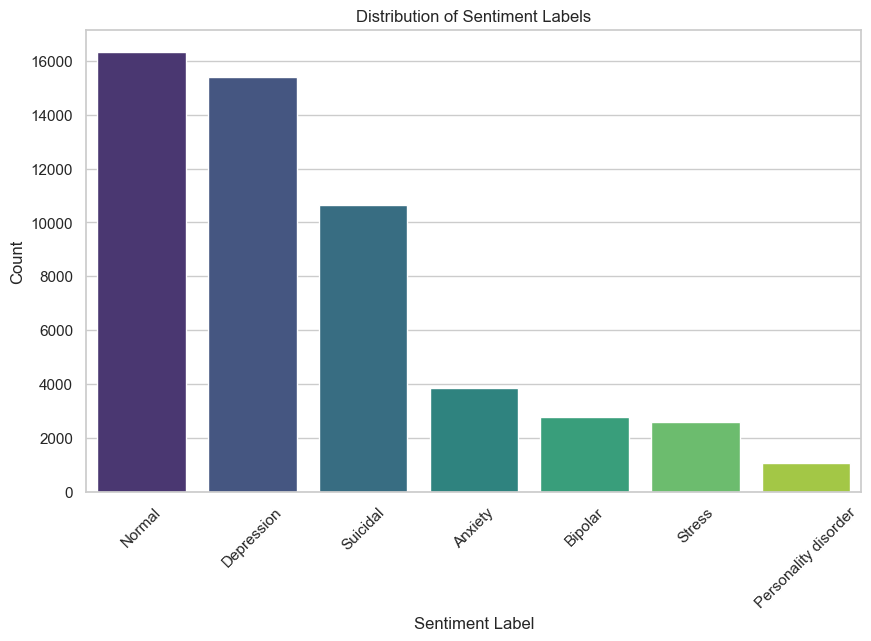

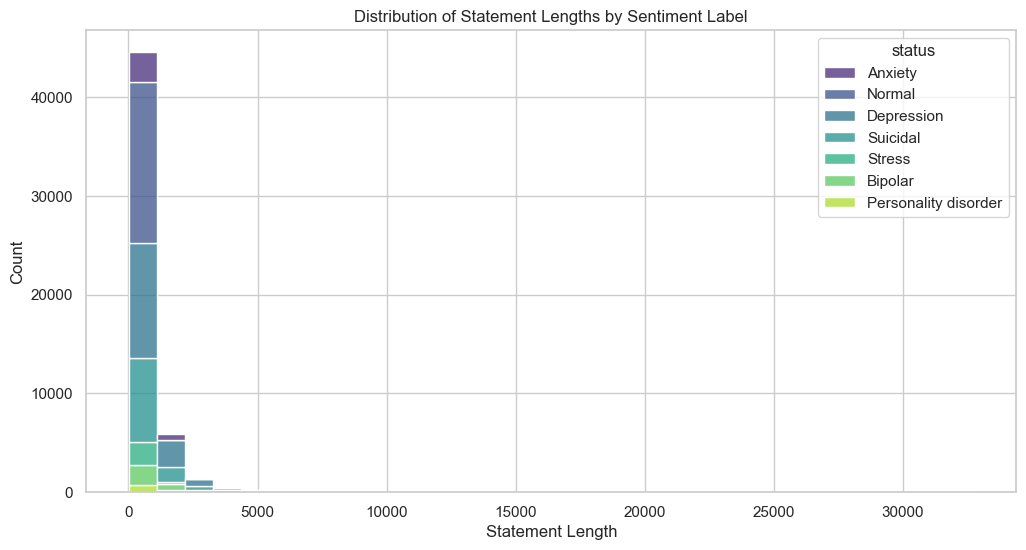

In [16]:
# Set the style for the plots
sns.set(style="whitegrid")

# Plot 1: Distribution of Sentiment Labels
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='status', order=data_cleaned['status'].value_counts().index, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot 2: Distribution of Statement Lengths by Sentiment Label
plt.figure(figsize=(12, 6))
sns.histplot(data=data_cleaned, x='statement_length', hue='status', multiple='stack', palette='viridis', bins=30)
plt.title('Distribution of Statement Lengths by Sentiment Label')
plt.xlabel('Statement Length')
plt.ylabel('Count')
#plt.xlim(0, 6000)
plt.show()


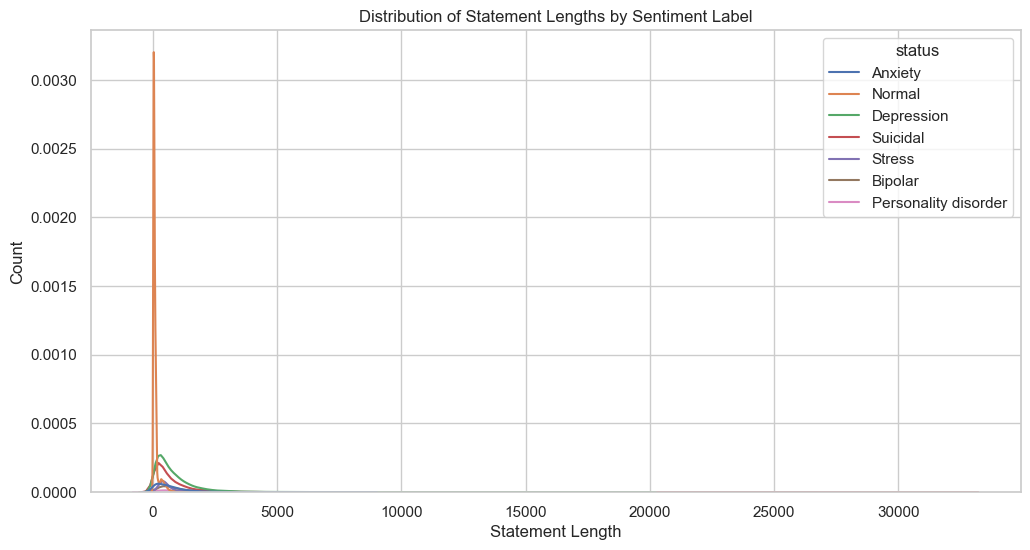

In [12]:
# Plot the histogram with a limit on the x-axis
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data_cleaned, x='statement_length', hue='status')
plt.title('Distribution of Statement Lengths by Sentiment Label')
plt.xlabel('Statement Length')
plt.ylabel('Count')
plt.xlim(0, 10000)  # Set x-axis limit to 10,000
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import string

# Load the dataset
file_path = '/Users/deveshdhyani/Documents/Disertation/Final_Draft/data/Combined_Data.csv'
data = pd.read_csv(file_path)

# Dropping the unnecessary column 'Unnamed: 0'
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Dropping rows with missing 'statement' values
data_cleaned = data_cleaned.dropna(subset=['statement'])

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Preprocessing function to clean the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stop words and punctuation
    words = [word for word in words if word not in stop_words and word not in punctuation]
    return words

# Apply preprocessing to the 'statement' column
data_cleaned['processed_statement'] = data_cleaned['statement'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/deveshdhyani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/deveshdhyani/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/var/folders/z7/w5bn8bvd4gn6ncplr933nsmc0000gn/T/ipykernel_87336/45518105.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=common_words_df, palette='viridis')


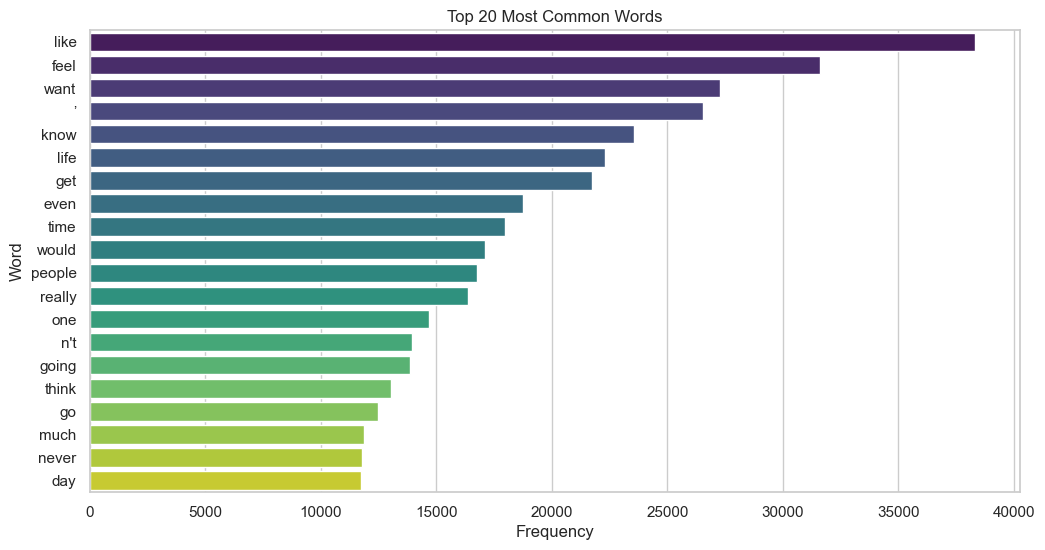

In [13]:
# Flatten the list of words into a single list
all_words = [word for statement in data_cleaned['processed_statement'] for word in statement]

# Calculate word frequencies
word_freq = Counter(all_words)

# Get the 20 most common words
common_words = word_freq.most_common(20)

# Convert to DataFrame for easier plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'frequency'])

# Plot the most common words
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=common_words_df, palette='viridis')
plt.title('Top 20 Most Common Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


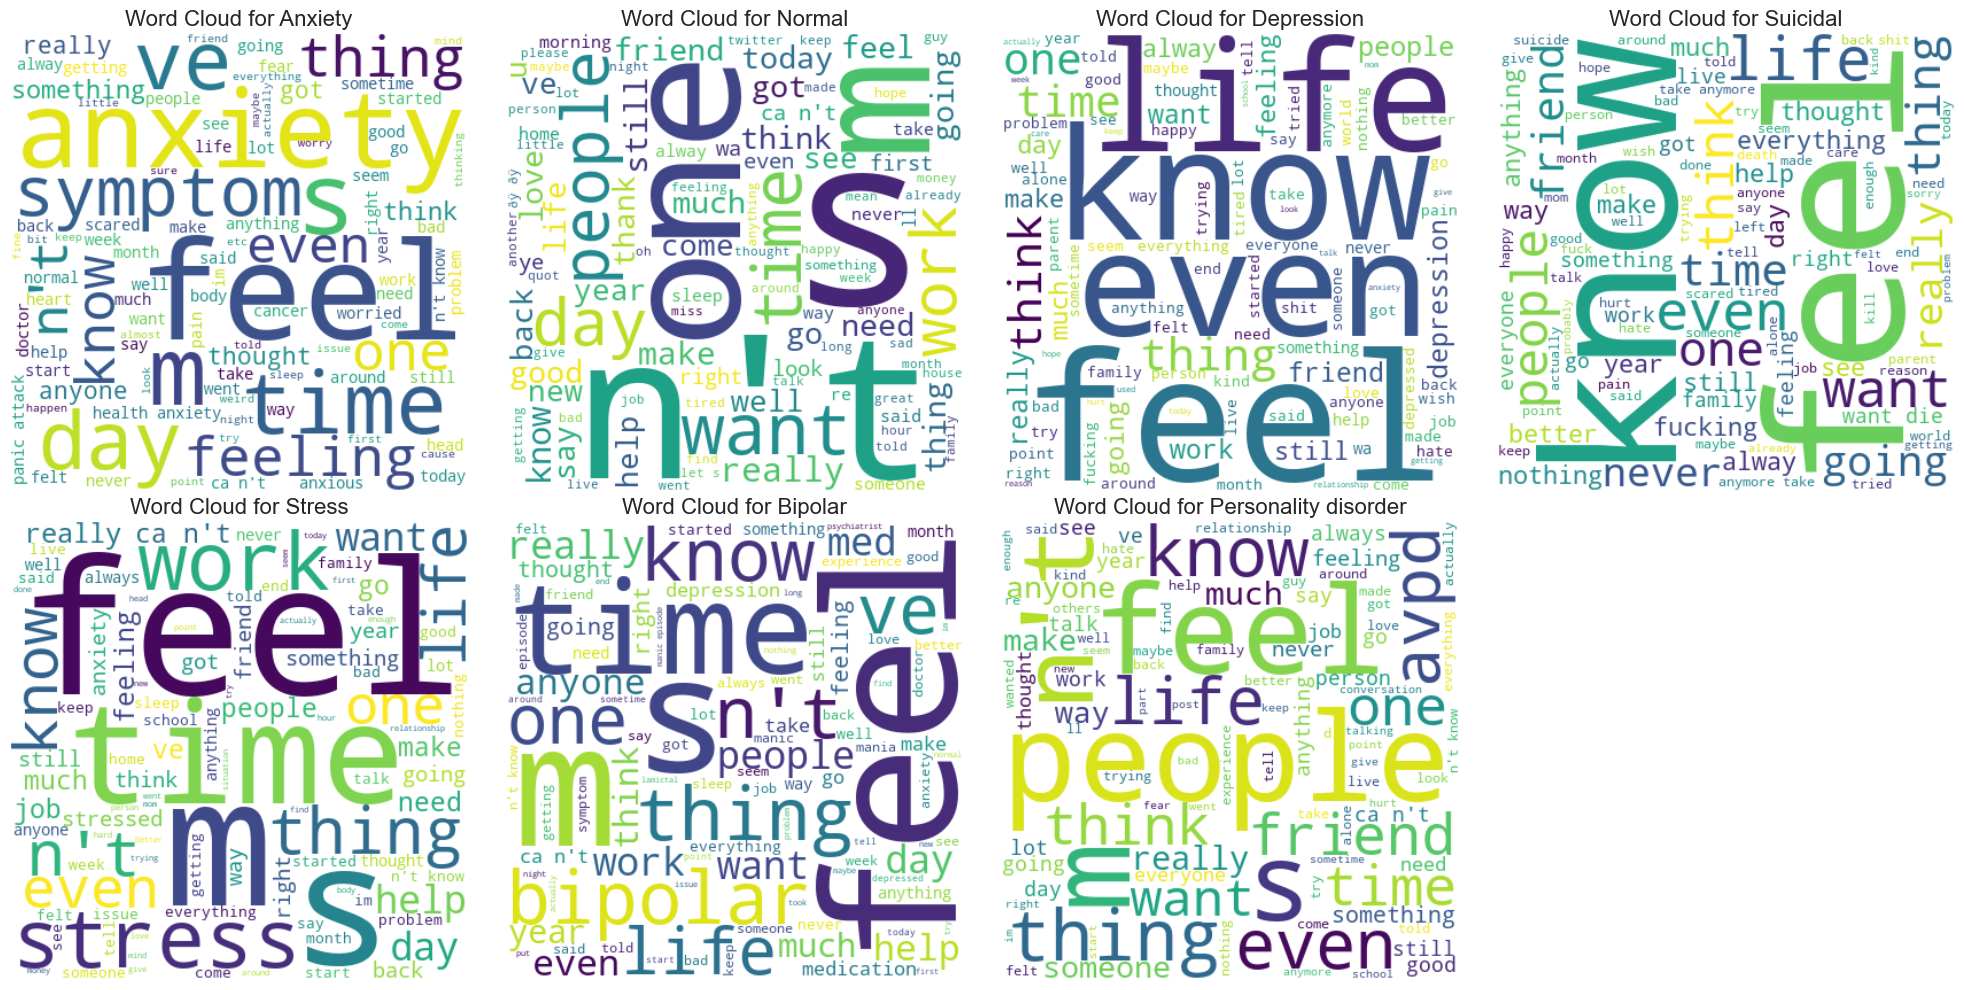

: 

In [22]:
# Function to generate a word cloud for a given text
def generate_word_cloud(text):
    return WordCloud(width=400, height=400, background_color='white', max_words=100, colormap='viridis').generate(text)

# Generate word clouds for each sentiment label
labels = data_cleaned['status'].unique()

# Prepare to plot in a grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Generate and plot word clouds for each label
for i, label in enumerate(labels):
    label_text = ' '.join([' '.join(statement) for statement in data_cleaned[data_cleaned['status'] == label]['processed_statement']])
    wordcloud = generate_word_cloud(label_text)
    
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Word Cloud for {label}', fontsize=16)

# Adjust layout and remove any unused subplots
for j in range(len(labels), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [5]:
status_counts = data['status'].value_counts()

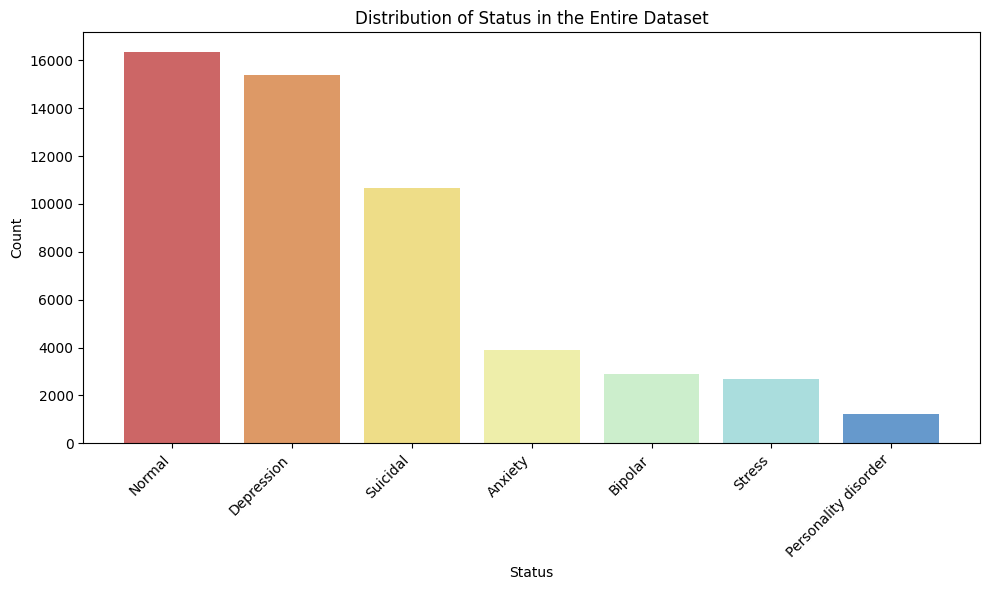

In [9]:
import matplotlib.pyplot as plt

# Define the custom colors
custom_colors = ['#cc6666', '#dd9966', '#eedd88', '#eeeeaa', '#cceecc', '#aadddd', '#6699cc']



# Plotting the bar chart for the entire dataset's status distribution
plt.figure(figsize=(10, 6))
plt.bar(status_counts.index, status_counts.values, color=custom_colors)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status in the Entire Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
